# **Decision Trees Implementation**

* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the basis of features of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
* A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

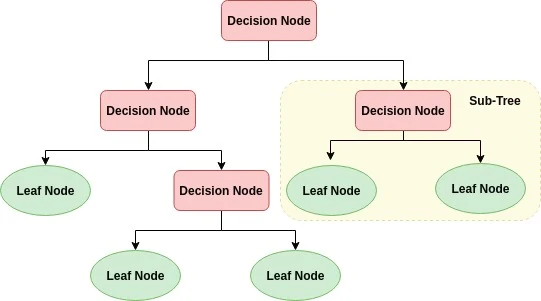

# **Why use Decision Trees?**
There are various algorithms in Machine learning, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating a machine learning model. Below are the two reasons for using the Decision tree:

* Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
* The logic behind the decision tree can be easily understood because it shows a tree-like structure.
# Decision Tree Terminologies
* Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
* Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
* Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
* Branch/Sub Tree: A tree formed by splitting the tree.
* Pruning: Pruning is the process of removing the unwanted branches from the tree.
* Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.


# Wheat Seeds Dataset
The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is a multiclass (3-class) classification problem. The number of observations for each class is balanced. There are 210 observations with 7 input variables and 1 output variable. The variable names are as follows:

Area.
Perimeter.
Compactness
Length of kernel.
Width of kernel.
Asymmetry coefficient.
Length of kernel groove.
Class (1, 2, 3).

In [ ]:
#mporting required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Files/seeds_dataset (2).csv")

In [ ]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,NaN,NaN
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,NaN,NaN
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,NaN,NaN
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,NaN,NaN


In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class (1, 2, 3)', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [ ]:
#dropping the unwanted columns
df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1,inplace=True)

In [ ]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class (1, 2, 3)            0
dtype: int64

In [ ]:
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


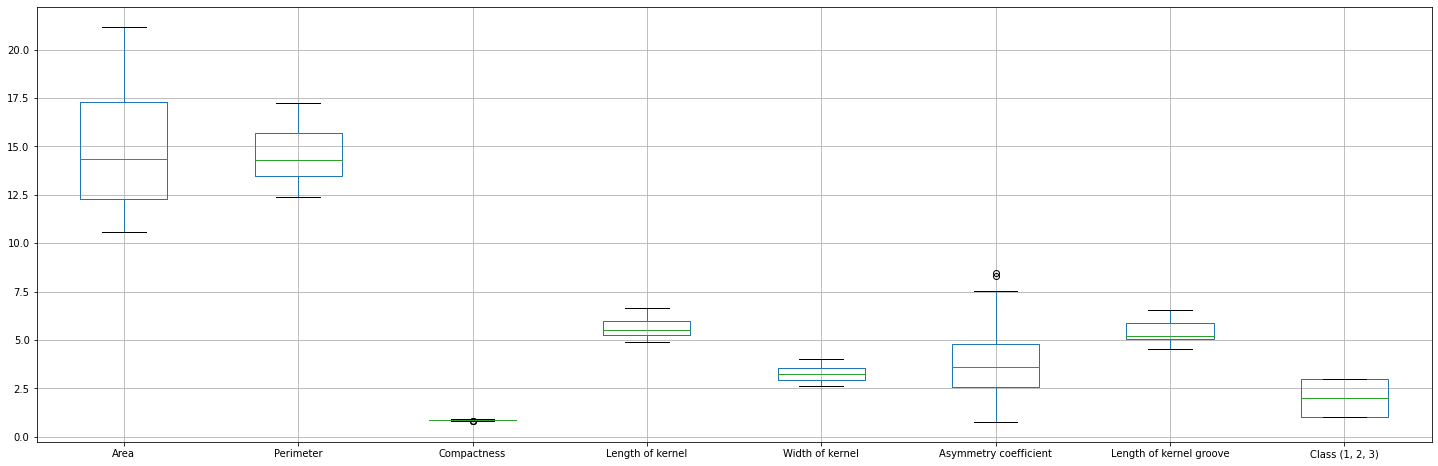

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
df.boxplot()

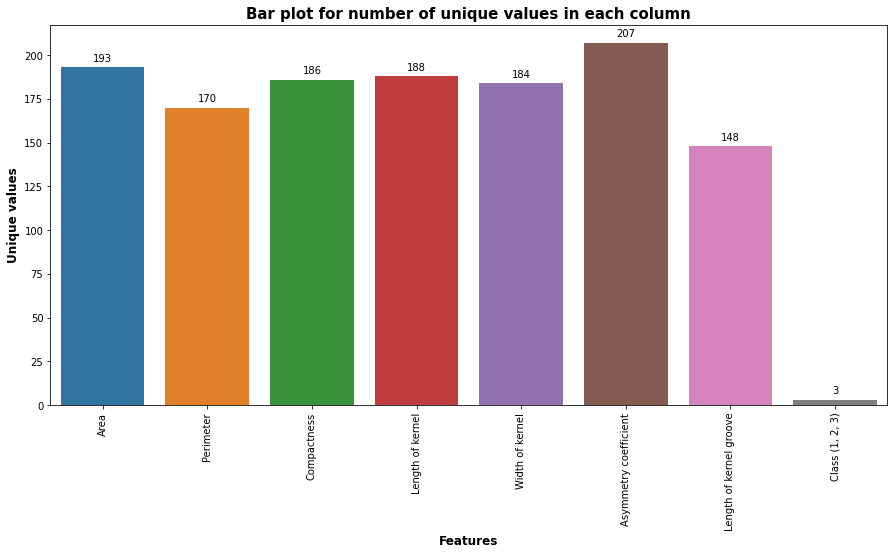

In [ ]:
#Unique Values In Each Feature Coulmn
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

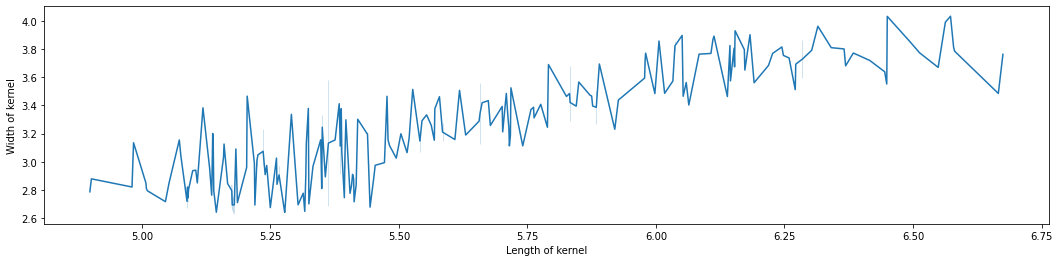

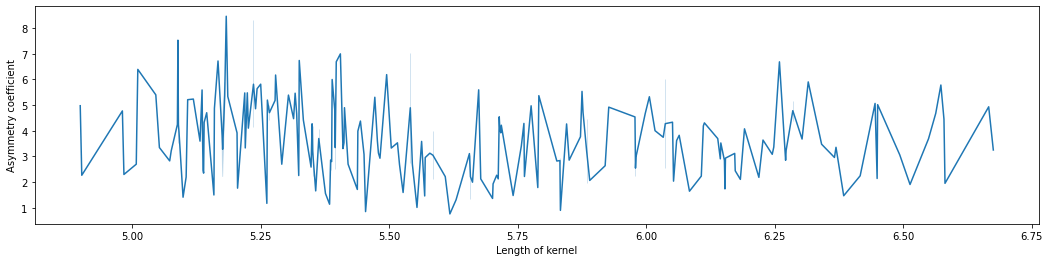

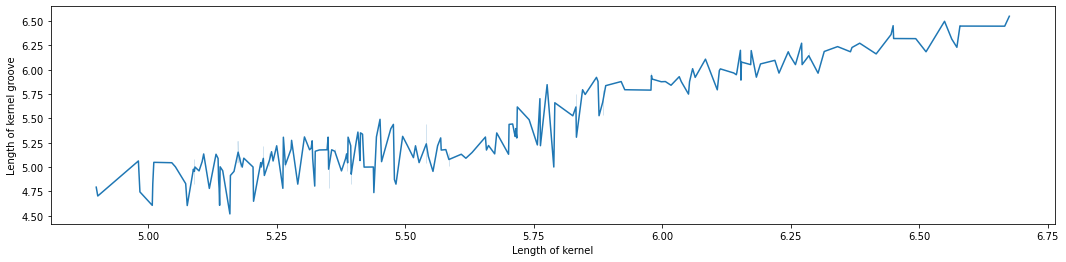

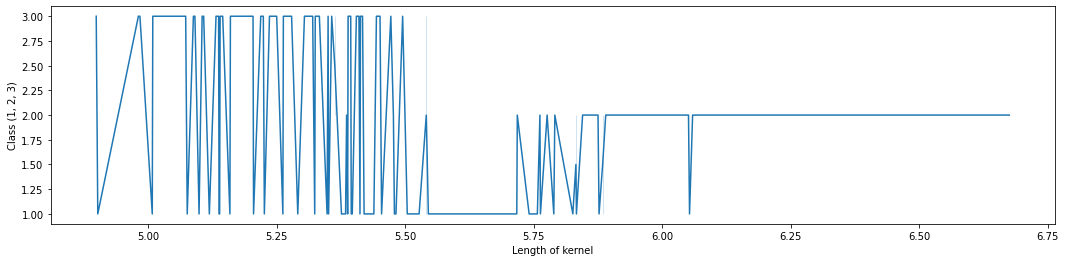

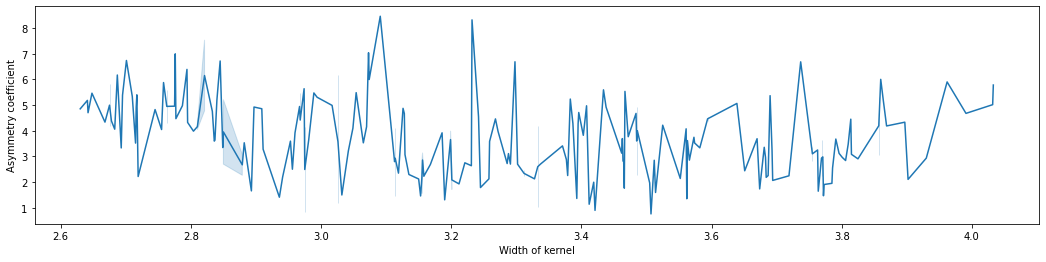

In [ ]:
#ploting the line plot Length of kernel vs Width of kernel and etc
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Length of kernel', y = "Width of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Length of kernel', y = "Asymmetry coefficient" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Length of kernel', y = "Length of kernel groove" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Length of kernel', y = "Class (1, 2, 3)" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Width of kernel', y = "Asymmetry coefficient" , data = df)




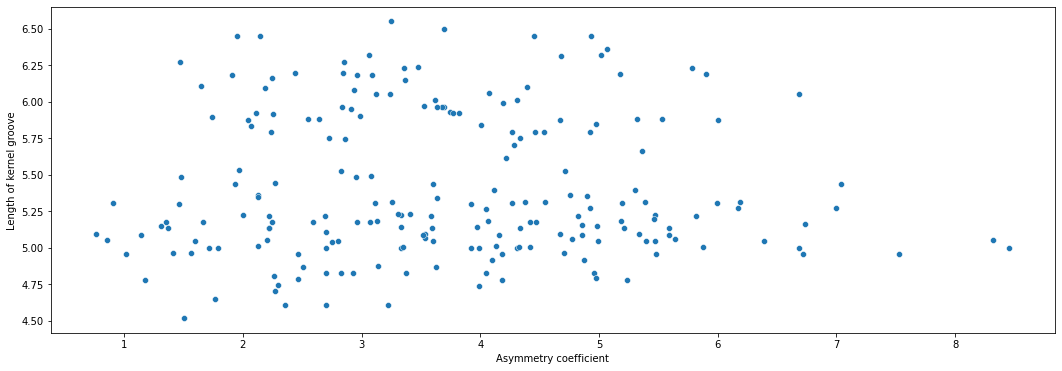

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='Asymmetry coefficient', y ='Length of kernel groove' ,data=df)

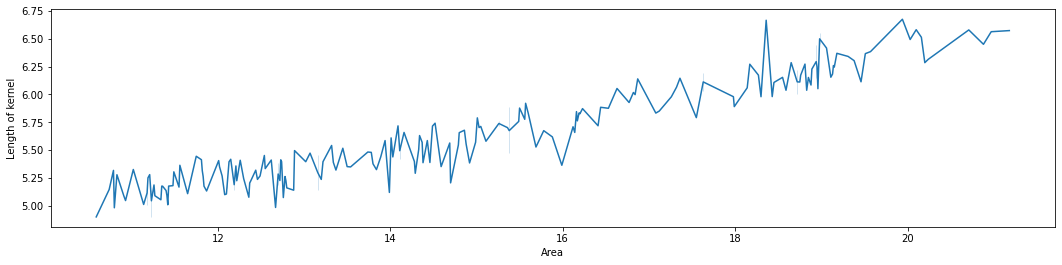

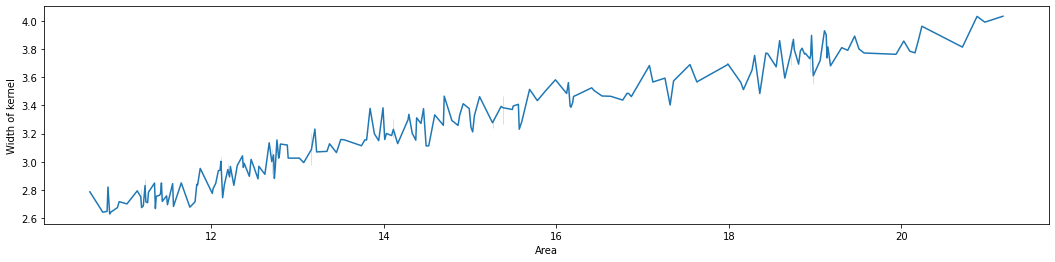

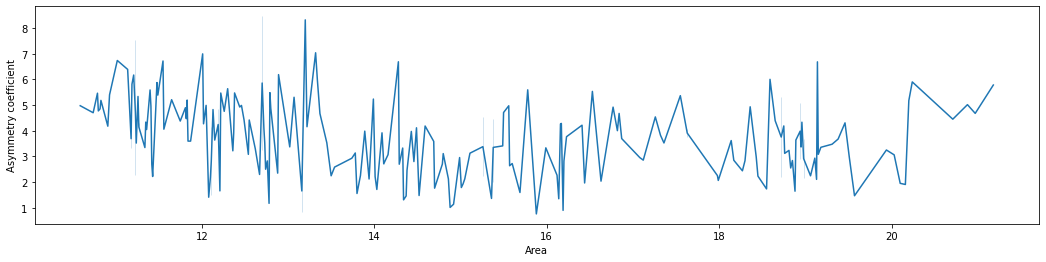

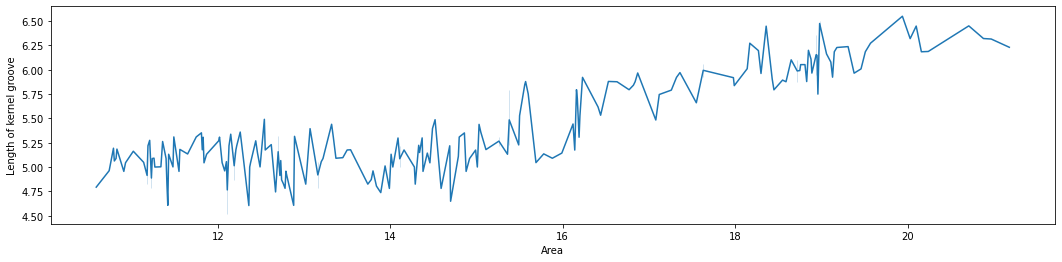

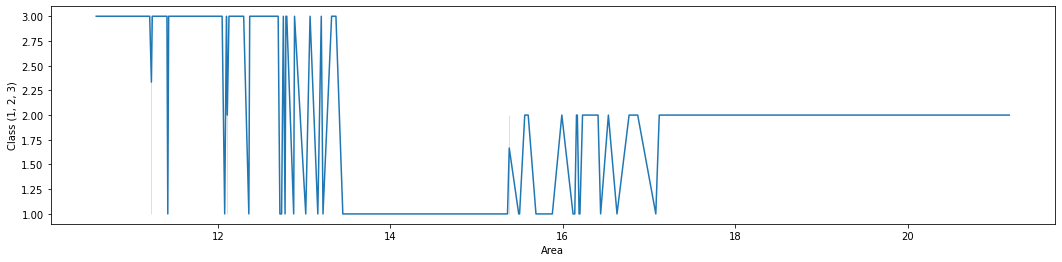

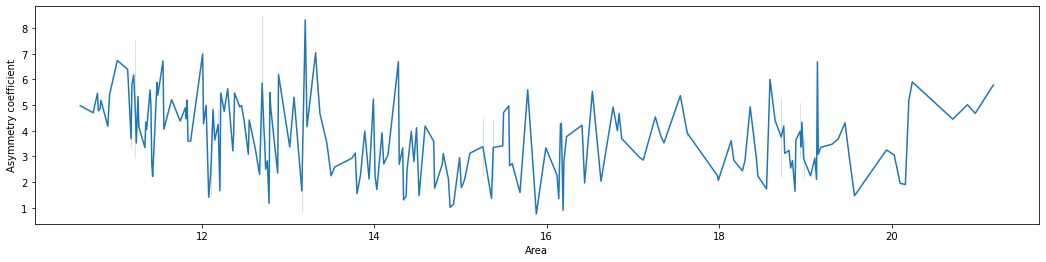

In [ ]:
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Length of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Width of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Asymmetry coefficient" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Length of kernel groove" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Class (1, 2, 3)" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Area', y = "Asymmetry coefficient" , data = df)

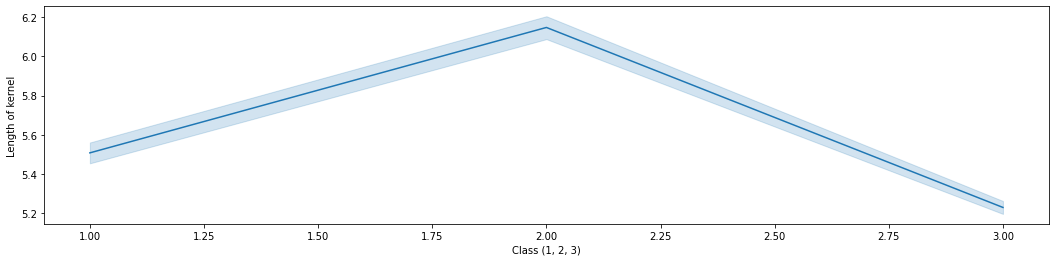

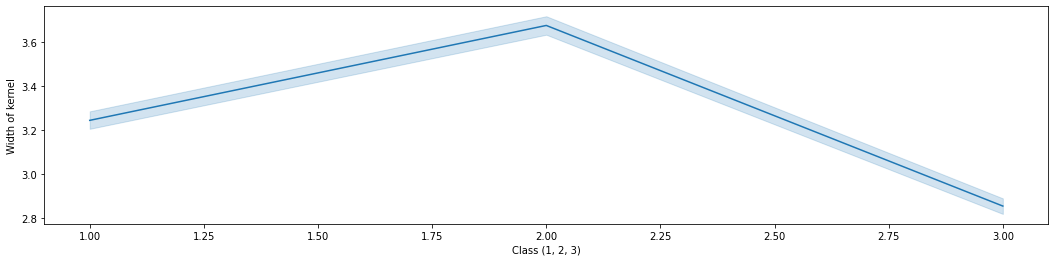

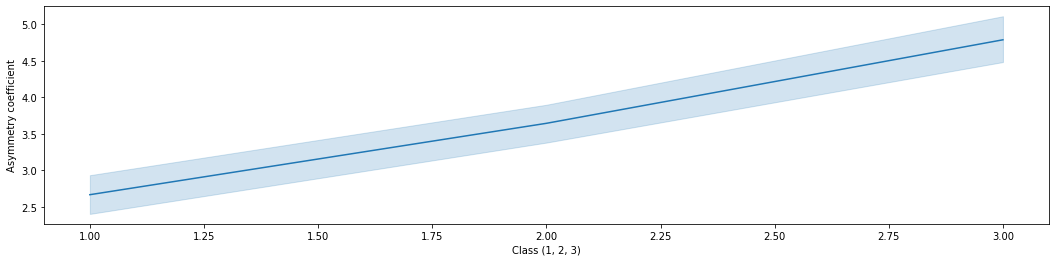

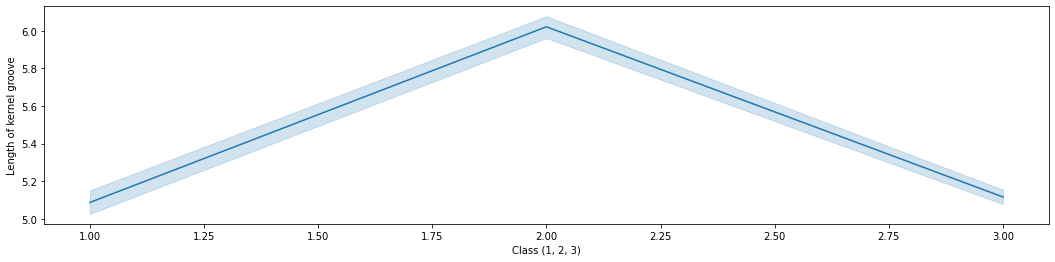

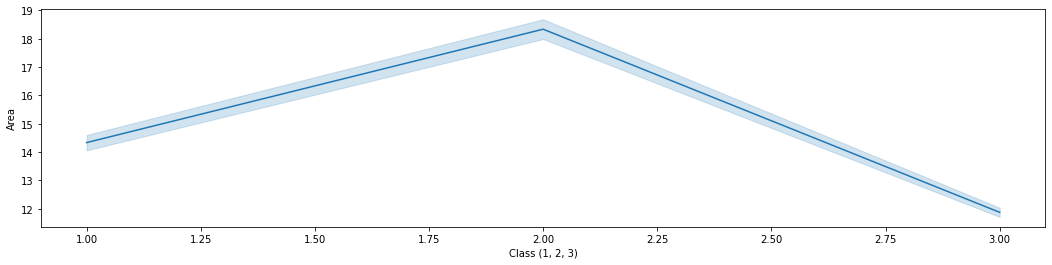

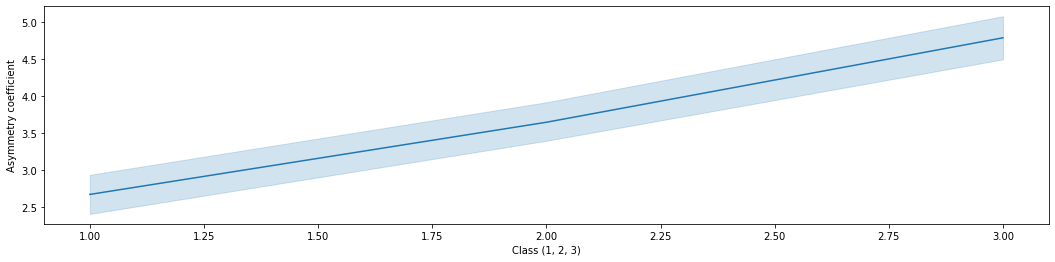

In [ ]:
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Length of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Width of kernel" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Asymmetry coefficient" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Length of kernel groove" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Area" , data = df)
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Class (1, 2, 3)', y = "Asymmetry coefficient" , data = df)

# **Builinding model**

In [ ]:
# Build Machine Learning Model
#Lets create feature matrix X  and y labels
X = df.drop(('Class (1, 2, 3)'),axis=1)
y = df['Class (1, 2, 3)']

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (210, 7)
y shape= (210,)


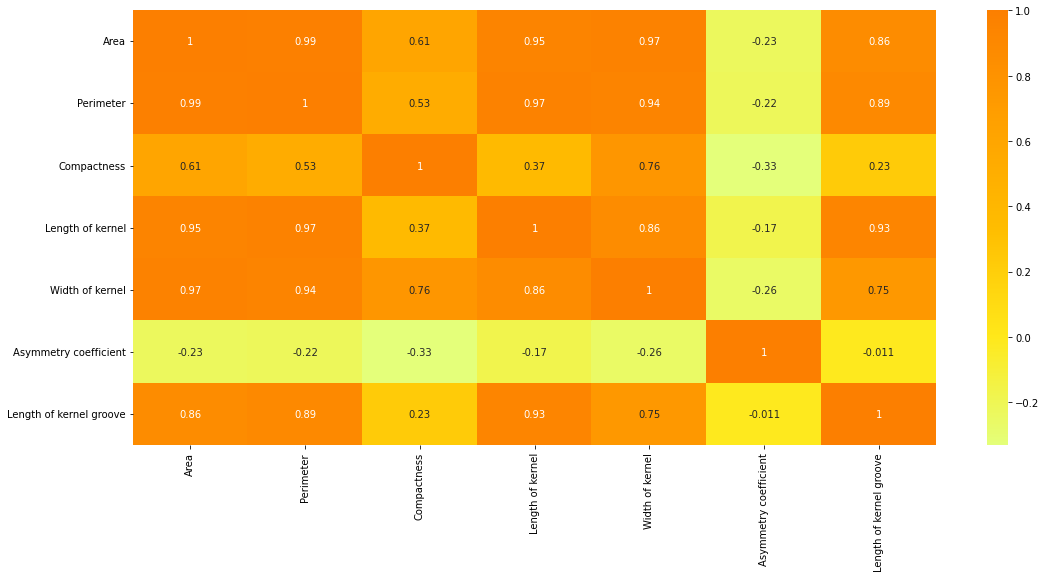

In [ ]:
#correlation plot
#Thier no correlation among variables.
plt.figure(figsize=(18,8))
corr = X.corr()
sns.heatmap(corr , cmap = 'Wistia' , annot = True);

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#X = df[list(df.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,19479.829297,Perimeter
3,8025.164434,Length of kernel
4,7906.280941,Width of kernel
2,5682.282348,Compactness
0,5096.572464,Area
6,1324.319458,Length of kernel groove
5,9.453784,Asymmetry coefficient


very high vif value for peremeter we will drop the perimeter variable and again check for vif value

In [ ]:
X1 = X.drop(('Perimeter'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_info['Column'] = X1.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,7871.430199,Width of kernel
1,4368.536819,Compactness
0,3741.956927,Area
2,3026.544441,Length of kernel
5,1320.493455,Length of kernel groove
4,9.444978,Asymmetry coefficient


In [ ]:
X2= X1.drop(('Compactness'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif_info['Column'] = X2.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,1847.220034,Length of kernel
4,1277.817278,Length of kernel groove
2,684.993394,Width of kernel
0,202.067058,Area
3,9.150246,Asymmetry coefficient


In [ ]:
X3= X2.drop(('Length of kernel'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif_info['Column'] = X3.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,365.684686,Width of kernel
3,228.997048,Length of kernel groove
0,157.687981,Area
2,8.674978,Asymmetry coefficient


as we see corelation between independent variables and we try to drop some varables its not working and at the end we will lose all data so now we will try to bulild some temporary variables so we will not lose any data
and after that we will check for vif value.

In [ ]:
X['DiffAreaPerimeter'] = X['Area'] - X['Perimeter']
X['DiffLengthWidth'] = X['Length of kernel'] - X['Width of kernel']


X4 = X.drop(['Area', 'Perimeter', 'Length of kernel', 'Width of kernel'], axis=1)

X4

,Compactness,Asymmetry coefficient,Length of kernel groove,DiffAreaPerimeter,DiffLengthWidth
0,0.8710,2.221,5.220,0.42,2.451
1,0.8811,1.018,4.956,0.31,2.221
2,0.9050,2.699,4.825,0.20,1.954
3,0.8955,2.259,4.805,-0.10,1.945
4,0.9034,1.355,5.175,1.15,2.096
...,...,...,...,...,...
205,0.8783,3.631,4.870,-1.01,2.156
206,0.8511,4.325,5.003,-1.65,2.345
207,0.8883,8.315,5.056,-0.46,2.004
208,0.8521,3.598,5.044,-1.37,2.339


In [ ]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif_info['Column'] = X4.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,1272.024168,Length of kernel groove
4,407.923219,DiffLengthWidth
0,337.048906,Compactness
1,9.272849,Asymmetry coefficient
3,6.248772,DiffAreaPerimeter


In [ ]:
X4['ABSDiffAreaPerimeter'] = X4['DiffAreaPerimeter'].abs()
X4['ABSDiffLengthWidth'] = X4['DiffLengthWidth'].abs()
X5 = X4.drop(['DiffAreaPerimeter','DiffLengthWidth'],axis=1)
X5

,Compactness,Asymmetry coefficient,Length of kernel groove,ABSDiffAreaPerimeter,ABSDiffLengthWidth
0,0.8710,2.221,5.220,0.42,2.451
1,0.8811,1.018,4.956,0.31,2.221
2,0.9050,2.699,4.825,0.20,1.954
3,0.8955,2.259,4.805,0.10,1.945
4,0.9034,1.355,5.175,1.15,2.096
...,...,...,...,...,...
205,0.8783,3.631,4.870,1.01,2.156
206,0.8511,4.325,5.003,1.65,2.345
207,0.8883,8.315,5.056,0.46,2.004
208,0.8521,3.598,5.044,1.37,2.339


In [ ]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif_info['Column'] = X5.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,427.393962,Length of kernel groove
0,218.663543,Compactness
4,157.262862,ABSDiffLengthWidth
1,7.402042,Asymmetry coefficient
3,7.016359,ABSDiffAreaPerimeter


In [ ]:
X6= X5.drop(('Length of kernel groove'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif_info['Column'] = X6.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,93.426307,ABSDiffLengthWidth
0,83.729639,Compactness
1,7.149289,Asymmetry coefficient
2,3.761417,ABSDiffAreaPerimeter


In [ ]:
X6.head()

,Compactness,Asymmetry coefficient,ABSDiffAreaPerimeter,ABSDiffLengthWidth
0,0.8710,2.221,0.42,2.451
1,0.8811,1.018,0.31,2.221
2,0.9050,2.699,0.20,1.954
3,0.8955,2.259,0.10,1.945
4,0.9034,1.355,1.15,2.096


In [ ]:
from sklearn.model_selection import train_test_split
X6_train,X6_test, y_train, y_test = train_test_split(X6, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X6_train.shape)
print('X_test dimension= ', X6_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (168, 4)
X_test dimension=  (42, 4)
y_train dimension=  (168,)
y_train dimension=  (42,)


In [ ]:
X6_train

,Compactness,Asymmetry coefficient,ABSDiffAreaPerimeter,ABSDiffLengthWidth
106,0.9056,2.843,2.68,2.346
151,0.8249,6.992,1.51,2.629
94,0.8452,4.933,1.84,3.181
84,0.8780,2.962,2.80,2.565
193,0.8256,4.853,2.01,2.550
...,...,...,...,...
203,0.8874,8.456,0.71,2.092
137,0.8527,2.640,0.42,2.689
72,0.8763,4.539,1.53,2.384
140,0.8480,5.304,0.85,2.478


In [ ]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
"""
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X6_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#Model Score on train data

#Check the model score using test data

cls.score(X6_train, y_train)

1.0

In [ ]:
#Model Score

#Check the model score using test data

cls.score(X6_test, y_test)

0.7619047619047619

[Text(0.40625, 0.95, 'X[2] <= 2.015\ngini = 0.664\nsamples = 168\nvalue = [50, 61, 57]'),
 Text(0.33482142857142855, 0.85, 'X[2] <= 0.4\ngini = 0.626\nsamples = 128\nvalue = [50, 22, 56]'),
 Text(0.29910714285714285, 0.75, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]'),
 Text(0.3705357142857143, 0.75, 'X[0] <= 0.862\ngini = 0.59\nsamples = 100\nvalue = [22, 22, 56]'),
 Text(0.17857142857142858, 0.65, 'X[2] <= 0.55\ngini = 0.227\nsamples = 47\nvalue = [1, 5, 41]'),
 Text(0.14285714285714285, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.21428571428571427, 0.55, 'X[3] <= 2.939\ngini = 0.165\nsamples = 45\nvalue = [1, 3, 41]'),
 Text(0.17857142857142858, 0.45, 'X[0] <= 0.858\ngini = 0.129\nsamples = 44\nvalue = [1, 2, 41]'),
 Text(0.10714285714285714, 0.35, 'X[2] <= 1.035\ngini = 0.053\nsamples = 37\nvalue = [1, 0, 36]'),
 Text(0.07142857142857142, 0.25, 'X[3] <= 2.504\ngini = 0.32\nsamples = 5\nvalue = [1, 0, 4]'),
 Text(0.03571428571428571, 0.15, 'gini = 0.0\nsamples = 4

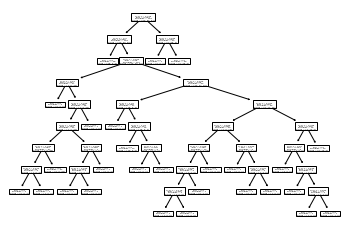

In [ ]:
tree.plot_tree(cls)

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X6_train, y_train)
y_pred_train = regressor.predict(X6_train)

In [ ]:
# R_square
R_square = cls.score(X6_train, y_train)
print('R square obtain for scikit learn library is :',R_square)

R square obtain for scikit learn library is : 1.0


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[50  0  0]
 [ 0 61  0]
 [ 0  0 57]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_test = regressor.predict(X6_test)

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[12  3  5]
 [ 0  9  0]
 [ 1  0 12]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print ("Accuracy : ",accuracy_score(y_test,y_pred_test)*100)
	
print("Report : ",classification_report(y_test, y_pred_test))

Accuracy :  78.57142857142857
Report :                precision    recall  f1-score   support

           1       0.92      0.60      0.73        20
           2       0.75      1.00      0.86         9
           3       0.71      0.92      0.80        13

    accuracy                           0.79        42
   macro avg       0.79      0.84      0.79        42
weighted avg       0.82      0.79      0.78        42



# GINI

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

# Performing training on train
clf_gini.fit(X6_train, y_train)

# Prediction using gini on test
y_pred_gini = clf_gini.predict(X6_test)
accuracy_score(y_test, y_pred_gini)

0.8095238095238095

In [ ]:
# Prediction using gini on train
y_pred_gini = clf_gini.predict(X6_train)
accuracy_score(y_train, y_pred_gini)

0.7678571428571429

In [ ]:
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)

# Performing training on training data
clf_entropy.fit(X6_train, y_train)
 
#Prediction using entropy on test data
y_pred_entropy = clf_entropy.predict(X6_test, clf_entropy)
accuracy_score(y_test, y_pred_entropy)
	

0.8095238095238095

In [ ]:
#Prediction using entropy on tain data
y_pred_entropy = clf_entropy.predict(X6_train, clf_entropy)
accuracy_score(y_train, y_pred_entropy)

0.7619047619047619

# **AUC-ROC Curve**

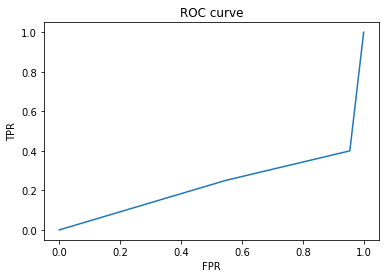

In [ ]:
# roc curve for models
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_test, pos_label=1)
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

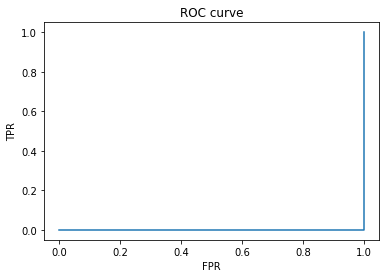

In [ ]:
# roc curve for models
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
fpr1, tpr1, thresh1 = roc_curve(y_pred_train,y_train, pos_label=1)
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# **pybaobabdt Package**

In [ ]:
pip install pybaobabdt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -q pydot

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [ ]:
import pybaobabdt
import pandas as pd
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier().fit(X6,y)

In [ ]:
features = list(df.columns)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 720x720 with 0 Axes>

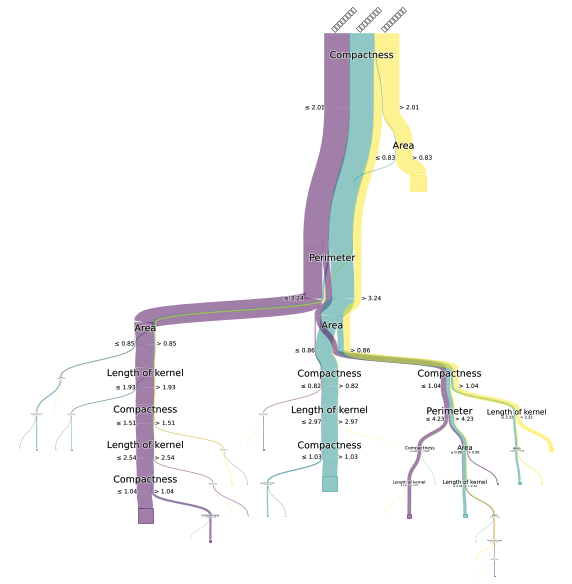

In [ ]:
ax = pybaobabdt.drawTree(clf, size=10, dpi=72, features=features)

In [ ]:
ax.get_figure().savefig('tree.png', format='png', dpi=300, transparent=True)

In [ ]:
import pybaobabdt
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=0)
clf.fit(X6, y)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)


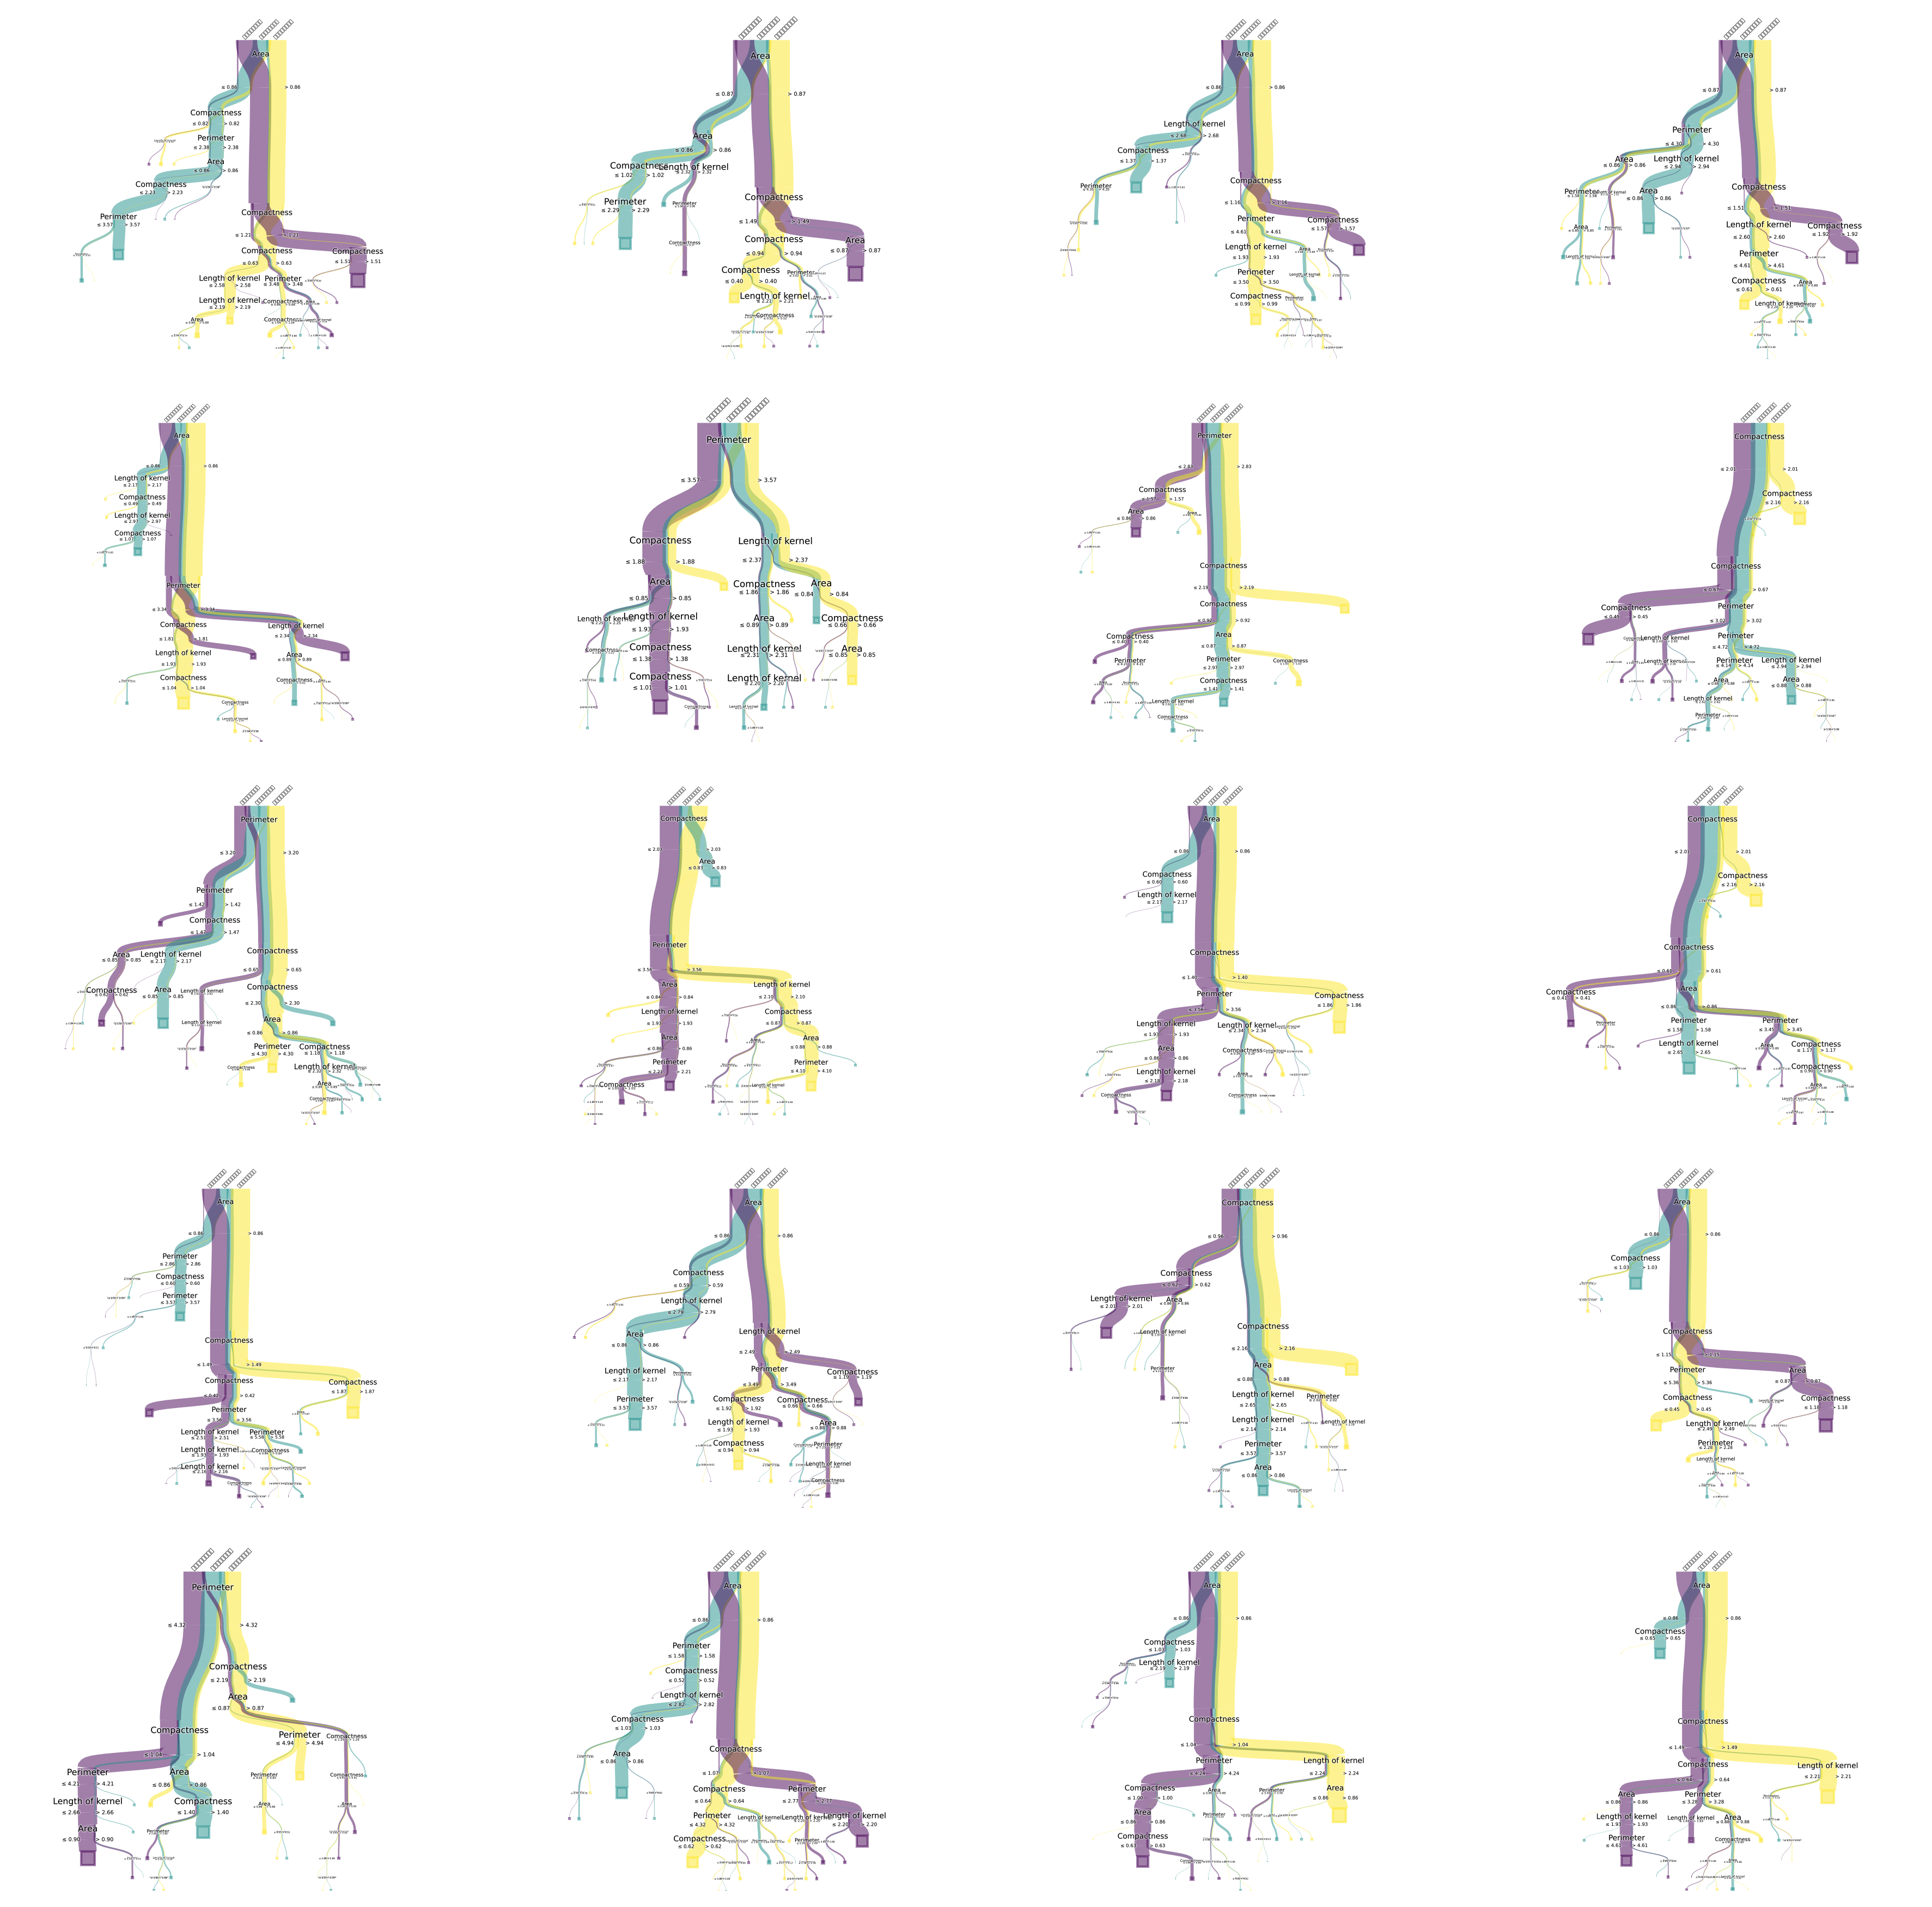

In [ ]:
size = (15,15)
plt.rcParams['figure.figsize'] = size
fig = plt.figure(figsize=size, dpi=300)

for idx, tree in enumerate(clf.estimators_):
    ax1 = fig.add_subplot(5, 4, idx+1)
    pybaobabdt.drawTree(tree, model=clf, size=15, dpi=300, features=features, ax=ax1)
    
fig.savefig('random-forest.png', format='png', dpi=1200, transparent=True)